# Diameter

In [1]:
import json
import os

from cycler import cycler
from pathlib import Path
from pprint import pprint

import arviz as az
import matplotlib as mpl
import numpy as np
import pandas as pd
import xarray as xr
import seaborn as sns

from matplotlib import pyplot as plt
from sphincter.data_preparation import load_prepared_data
from sphincter.plotting import plot_obs, plot_predictive, save_figure

INFERENCES_DIR = Path("..") / "inferences"
DATA_DIR = Path("..") / "data"
PLOTS_DIR = Path("..") / "plots"
CMAP = plt.get_cmap('Set2')

plt.rcParams['axes.prop_cycle'] = cycler(color=CMAP.colors)

In [2]:
raw = pd.read_csv(DATA_DIR / "raw" / "data_sphincter_paper.csv")
prepared = load_prepared_data(DATA_DIR / "prepared" / "pulsatility.json")
msts = prepared.measurements
msts

/Users/tedgro/repos/teddygroves/sphincter/.venv/lib/python3.13/site-packages/pyspark/pandas/__init__.py:50: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


,age,mouse,vessel_type,treatment,pd1,pd2,pd3,pd_sum,pd_ratio,pc1,pc2,pc3,pc_sum,pc_ratio,pressure_d,pressure_norm,diameter,diameter_norm,speed
951,adult,100920,bulb,baseline,2092.769661,230.101368,NaN,2322.871030,0.099059,429.023989,62.665046,NaN,491.689035,0.127449,53.897095,-10.928549,7.602068,-1.584940,NaN
952,adult,100920,cap1,baseline,248.834511,22.605898,4.536618,275.977028,0.081912,110.760211,26.535705,7.343648,144.639565,0.183461,52.141367,-12.684277,5.478392,-1.470458,NaN
953,adult,100920,cap2,baseline,91.102217,17.483219,NaN,108.585437,0.161009,799.006296,86.906644,NaN,885.912939,0.098098,52.015743,-12.809901,3.422574,-2.909203,NaN
954,adult,100920,cap3,baseline,71.696774,13.260128,NaN,84.956902,0.156081,333.158678,53.719684,NaN,386.878362,0.138854,53.169234,-11.656410,3.593345,-2.330455,NaN
949,adult,100920,pen_art,baseline,713.220873,32.719247,NaN,745.940119,0.043863,60.922862,3.217208,NaN,64.140070,0.050159,52.937415,-11.888229,11.229894,-3.101070,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,old,70921,cap4,after_ablation,349.130122,34.586358,5.652198,389.368678,0.088827,210.788359,28.466366,3.230240,242.484965,0.117394,41.341911,-20.039797,6.876791,1.377800,1.879609
1479,old,70921,cap4,after_hyper,148.901628,14.440734,NaN,163.342362,0.088408,56.990737,5.981480,NaN,62.972217,0.094986,45.762510,-15.619199,5.912477,0.413486,1.918037
1467,old,70921,cap4,baseline,89.617245,9.774013,0.522649,99.913907,0.097824,75.143608,11.950067,0.452126,87.545801,0.136501,48.828848,-12.552860,5.658166,0.159174,1.440864
1461,old,70921,pen_art,baseline,1774.598017,299.930384,71.410804,2145.939204,0.139766,593.486878,54.247116,12.599400,660.333395,0.082151,48.380029,-13.001680,14.824925,0.493960,NaN


<Axes: xlabel='vessel_type', ylabel='diameter'>

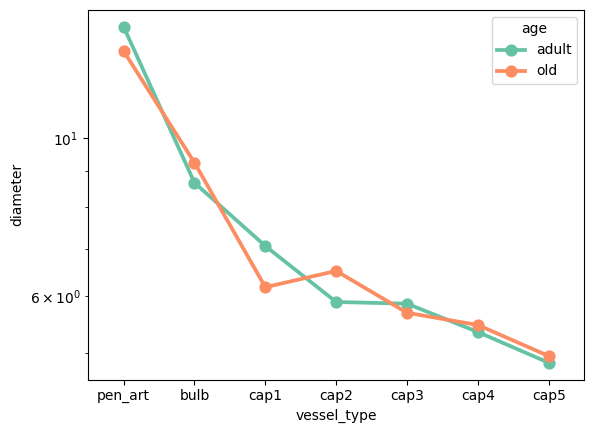

In [3]:
sns.pointplot(msts, x="vessel_type", y="diameter", hue="age", log_scale=True, errorbar=None)

In [4]:
idata = az.InferenceData.from_zarr(os.path.join(INFERENCES_DIR, "diameter", "idata"))
idata

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> sample_stats_prior
	> observed_data

In [5]:
az.summary(idata, var_names="mu", filter_vars="regex")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu[adult],1.975,0.163,1.669,2.283,0.005,0.004,962.0,1331.0,1.0
mu[old],1.959,0.161,1.658,2.266,0.005,0.004,951.0,1305.0,1.0


In [6]:
az.summary(idata, var_names="sigma")

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,0.238,0.007,0.225,0.251,0.0,0.0,5856.0,2761.0,1.0


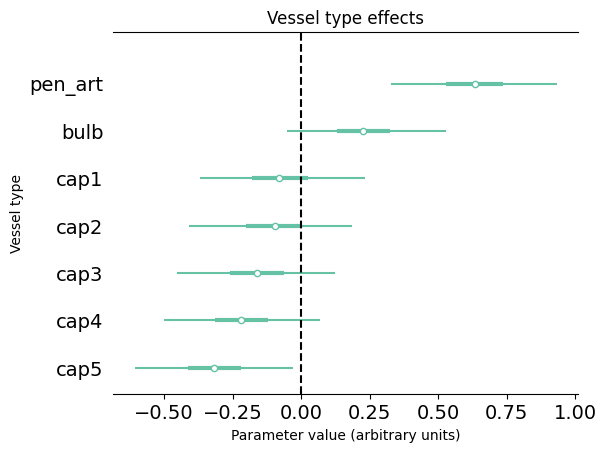

In [7]:
az.plot_forest(
    idata.posterior["a_vessel_type"], 
    combined=True,
    labeller=az.labels.NoVarLabeller()
);
f = plt.gcf();
ax = plt.gca();
ax.set(
    ylabel="Vessel type",
    title="Vessel type effects",
    xlabel="Parameter value (arbitrary units)"
);
ax.axvline(0.0, linestyle="--", color="black");
save_figure(f, "diameter-vessel-type-effects")

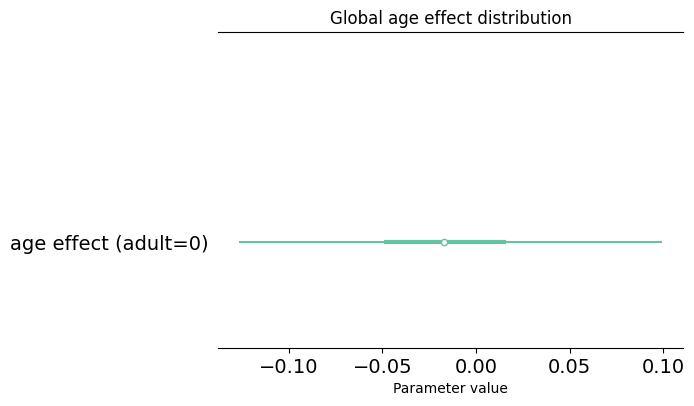

In [8]:
t = (
    idata.posterior["mu"] - idata.posterior["mu"].sel(age="adult")
).rename("age effect (adult=0)")


az.plot_forest(
    t, 
    combined=True, coords={"age": ["old"]},
);
f = plt.gcf();
ax = plt.gca();
ax.set(xlabel="Parameter value", title="Global age effect distribution");
save_figure(f, "diameter-age-effect-global")

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

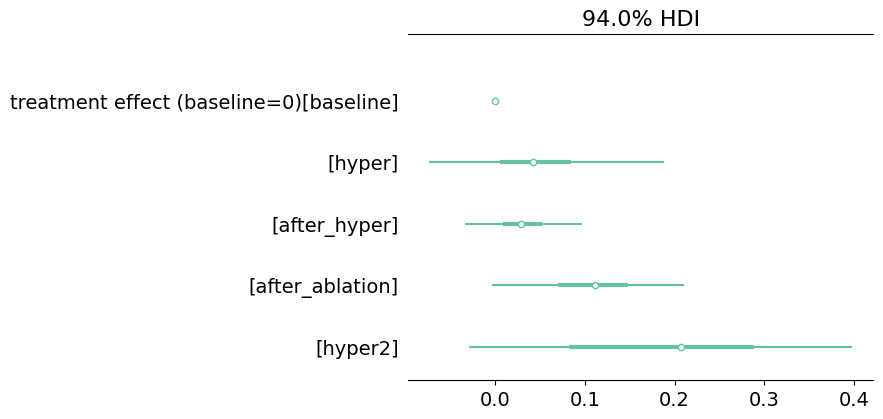

In [9]:
t = (
    idata.posterior["a_treatment"]
    - idata.posterior["a_treatment"].sel(treatment="baseline")
).rename("treatment effect (baseline=0)")

az.plot_forest(t, combined=True)

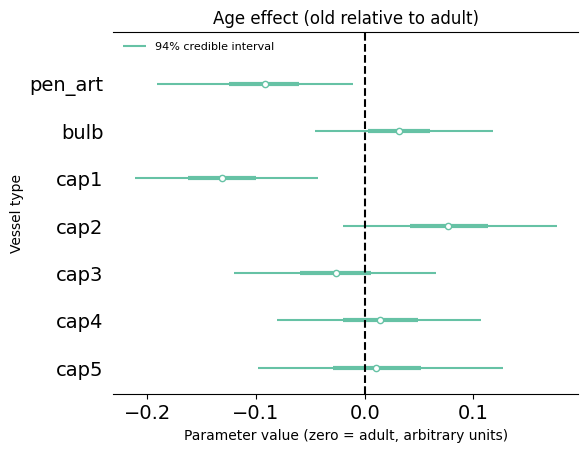

In [10]:
t = (
    idata.posterior["mu"] - idata.posterior["mu"].sel(age="adult")
    + (idata.posterior["a_age_vessel_type"] - idata.posterior["a_age_vessel_type"].sel(age="adult"))
).transpose(*["chain", "draw", "vessel_type", "age"]).rename("effect")

az.plot_forest(
    t, 
    combined=True,
    coords={"age": "old"},
    legend=True,
    labeller=az.labels.NoVarLabeller()
    
)
f = plt.gcf()
ax = plt.gca()
ax.axvline(0, linestyle="--", color="black")
ax.legend([ax.collections[0]], ["94% credible interval"], frameon=False, loc="upper left", fontsize=8)
ax.set(
    title="Age effect (old relative to adult)", 
    xlabel="Parameter value (zero = adult, arbitrary units)",
    ylabel="Vessel type"
);
save_figure(f, "diameter_age_effects")

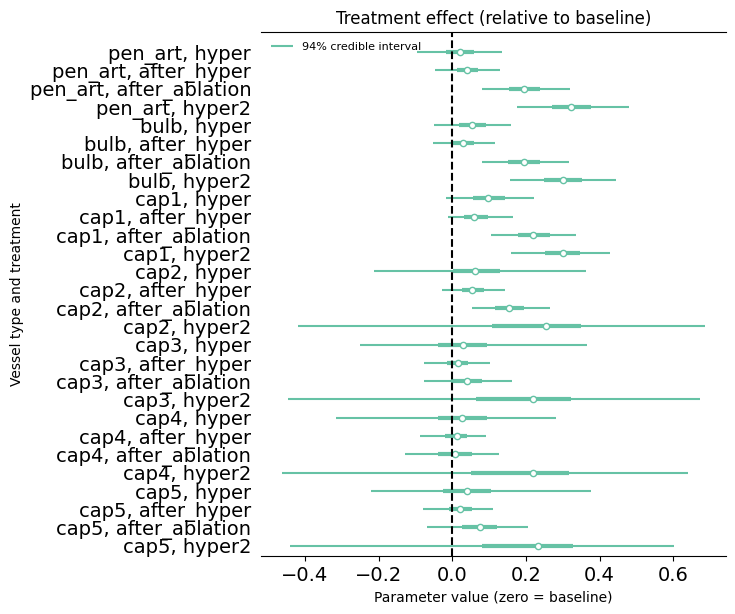

In [11]:
t = (
    (idata.posterior["a_treatment"] - idata.posterior["a_treatment"].sel(treatment="baseline"))
    + (idata.posterior["a_vessel_type_treatment"] - idata.posterior["a_vessel_type_treatment"].sel(treatment="baseline"))
).transpose(*["chain", "draw", "vessel_type", "treatment"]).rename("effect")

az.plot_forest(
    t, 
    combined=True,
    coords={"treatment": ["hyper", "after_hyper", "after_ablation", "hyper2"]},
    legend=True,
    labeller=az.labels.NoVarLabeller()
)
f = plt.gcf()
ax = plt.gca()
ax.axvline(0, linestyle="--", color="black")
ax.legend([ax.collections[0]], ["94% credible interval"], frameon=False, loc="upper left", fontsize=8)
ax.set(
    title="Treatment effect (relative to baseline)",
    xlabel="Parameter value (zero = baseline)",
    ylabel="Vessel type and treatment"
);
save_figure(f, "diameter-treatment")

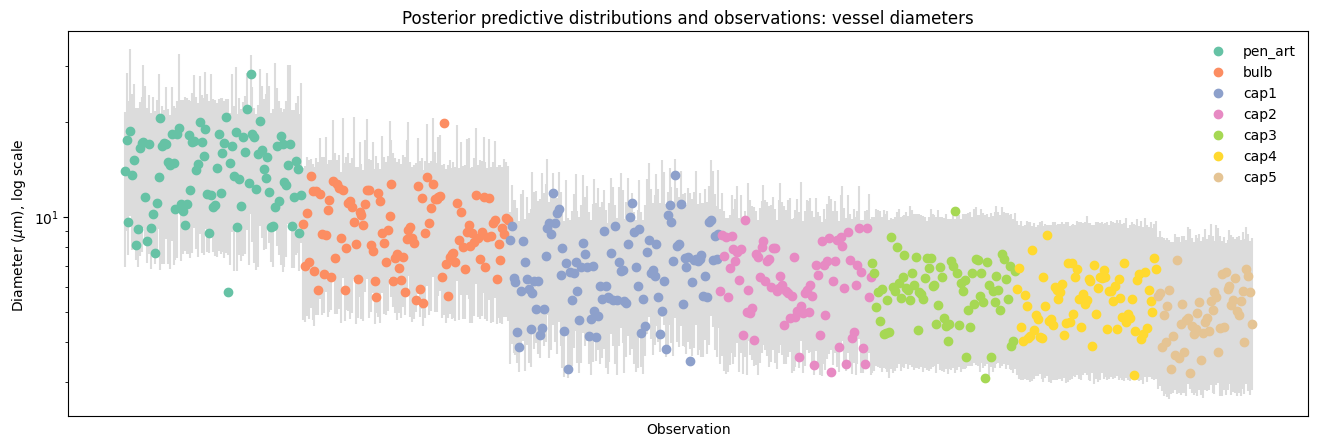

In [12]:
yrep = idata.posterior_predictive["yrep"]

f, ax = plt.subplots(1, 1, figsize=[16, 5])

plot_obs(ax, msts["diameter"], cat=msts["vessel_type"]);
plot_predictive(ax, yrep, zorder=-1, cat=msts["vessel_type"])
ax.legend(frameon=False);
ax.semilogy();
ax.set_xticks([])
ax.set(
    title="Posterior predictive distributions and observations: vessel diameters",
    xlabel="Observation",
    ylabel="Diameter ($\\mu$m), log scale"
      
)
save_figure(f, "diameter-ppc")

[]

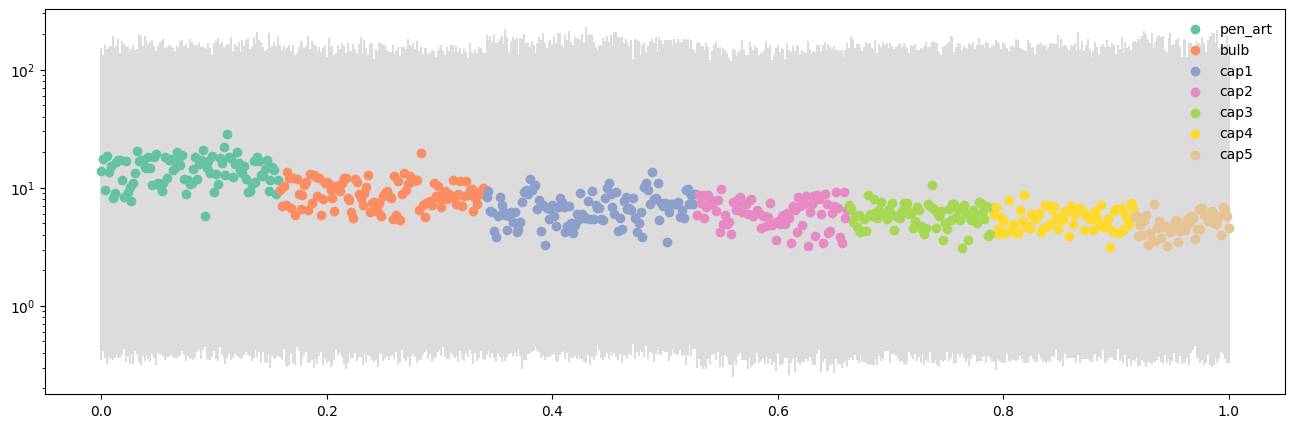

In [13]:
yrep = idata.prior_predictive["yrep"]

f, ax = plt.subplots(1, 1, figsize=[16, 5])

plot_obs(ax, msts["diameter"], cat=msts["vessel_type"]);
plot_predictive(ax, yrep, zorder=-1, cat=msts["vessel_type"])
ax.legend(frameon=False)
ax.semilogy()